<a href="https://colab.research.google.com/github/mdsiam135/thesis_2025/blob/main/SVM(3_labels).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ============================================================================
# SVM CROP PRODUCTION CLASSIFICATION - STEP BY STEP COLAB EXECUTION
# ============================================================================

# STEP 1: INSTALL AND IMPORT LIBRARIES
# Execute this cell first
print("="*60)
print("STEP 1: IMPORTING LIBRARIES")
print("="*60)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix,
                           accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix)
from sklearn.model_selection import validation_curve, cross_val_score
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")
print("Libraries used:")
print("- pandas, numpy: Data manipulation")
print("- matplotlib, seaborn: Visualization")
print("- sklearn: Machine learning")


STEP 1: IMPORTING LIBRARIES
✅ All libraries imported successfully!
Libraries used:
- pandas, numpy: Data manipulation
- matplotlib, seaborn: Visualization
- sklearn: Machine learning


In [3]:

# ============================================================================

# STEP 2: SET RANDOM SEED AND INITIALIZE VARIABLES
print("\n" + "="*60)
print("STEP 2: SETTING UP ENVIRONMENT")
print("="*60)

# Set random seed for reproducibility
np.random.seed(42)
print("✅ Random seed set to 42 for reproducibility")

# Initialize variables that will be used throughout
label_mapping = {'low': 0, 'medium': 1, 'high': 2}
reverse_label_mapping = {0: 'low', 1: 'medium', 2: 'high'}
training_history = {'train_acc': [], 'val_acc': []}
scaler = StandardScaler()

print("✅ Label mappings created:")
print(f"   {label_mapping}")
print("✅ StandardScaler initialized")
print("✅ Training history dictionary created")



STEP 2: SETTING UP ENVIRONMENT
✅ Random seed set to 42 for reproducibility
✅ Label mappings created:
   {'low': 0, 'medium': 1, 'high': 2}
✅ StandardScaler initialized
✅ Training history dictionary created


In [4]:

# ============================================================================

# STEP 3: LOAD DATASETS
print("\n" + "="*60)
print("STEP 3: LOADING DATASETS")
print("="*60)

# NOTE: Update these paths according to your Google Drive structure
train_path = '/content/drive/MyDrive/UpdatedDataset/train.csv'
val_path = '/content/drive/MyDrive/UpdatedDataset/validation.csv'
test_path = '/content/drive/MyDrive/UpdatedDataset/test.csv'

# Mount Google Drive first (uncomment if needed)
# from google.colab import drive
# drive.mount('/content/drive')

try:
    # Load datasets
    train_df = pd.read_csv(train_path)
    val_df = pd.read_csv(val_path)
    test_df = pd.read_csv(test_path)

    print("✅ Datasets loaded successfully!")
    print(f"Train dataset shape: {train_df.shape}")
    print(f"Validation dataset shape: {val_df.shape}")
    print(f"Test dataset shape: {test_df.shape}")

    # Display basic info about datasets
    print("\n📊 DATASET OVERVIEW:")
    print("Train dataset columns:", list(train_df.columns))
    print("\nTrain dataset head:")
    print(train_df.head())

    print("\nTrain dataset info:")
    print(train_df.info())

    print("\nProduction statistics:")
    print(train_df['Production (M.Ton)'].describe())

except FileNotFoundError as e:
    print("❌ Error loading datasets!")
    print("Please ensure your CSV files are in the correct path and Google Drive is mounted")
    print(f"Error: {e}")



STEP 3: LOADING DATASETS
✅ Datasets loaded successfully!
Train dataset shape: (3942, 84)
Validation dataset shape: (845, 84)
Test dataset shape: (845, 84)

📊 DATASET OVERVIEW:
Train dataset columns: ['Production (M.Ton)', 'Area (Acres)', 'Temperature at 2 Meters Range (C)', 'Year', 'soil_temperature_0_to_7cm(C)', 'Root Zone Soil Wetness (surface to 100 cm below)', 'Surface Soil Wetness (surface to 5 cm below)', 'soil_moisture_0_to_7cm(mÂ³/mÂ³)', 'soil_moiture_7_to_28cm(mÂ³/mÂ³)', 'total_rain_mm', 'relative_humidity_2m(%)', 'Precipitation Corrected (mm)', 'Crop_Beans', 'Crop_Cabbage', 'Crop_Cauliflower', 'Crop_Garlic', 'Crop_Laushak', 'Crop_Onion', 'Crop_Radish', 'Crop_Tomato', 'District_Bagerhat', 'District_Bandarban', 'District_Barguna', 'District_Barishal', 'District_Bhola', 'District_Bogura', 'District_Brahmanbaria', 'District_Chandpur', 'District_Chapai Nawabganj', 'District_Chattogram', 'District_Chuadanga', 'District_Comilla', "District_Cox's Bazar", 'District_Dhaka', 'District_

In [5]:

# ============================================================================

# STEP 4: CREATE CLASSIFICATION LABELS
print("\n" + "="*60)
print("STEP 4: CREATING CLASSIFICATION LABELS")
print("="*60)

# Combine all production data to calculate consistent quantiles
all_production = pd.concat([
    train_df['Production (M.Ton)'],
    val_df['Production (M.Ton)'],
    test_df['Production (M.Ton)']
])

# Calculate quantiles
q33 = all_production.quantile(0.33)
q66 = all_production.quantile(0.66)

print(f"📊 QUANTILE BOUNDARIES:")
print(f"   Low Production: < {q33:.3f} M.Ton")
print(f"   Medium Production: {q33:.3f} - {q66:.3f} M.Ton")
print(f"   High Production: > {q66:.3f} M.Ton")

# Create labels for each dataset
datasets = [(train_df, 'Train'), (val_df, 'Validation'), (test_df, 'Test')]

for df, name in datasets:
    df['label'] = pd.cut(df['Production (M.Ton)'],
                       bins=[-np.inf, q33, q66, np.inf],
                       labels=['low', 'medium', 'high'])

    print(f"\n{name} Dataset Label Distribution:")
    label_counts = df['label'].value_counts()
    print(label_counts)

    # Calculate percentages
    label_percentages = df['label'].value_counts(normalize=True) * 100
    print("Percentages:")
    for label, percentage in label_percentages.items():
        print(f"   {label}: {percentage:.1f}%")

print("✅ Labels created successfully for all datasets!")



STEP 4: CREATING CLASSIFICATION LABELS
📊 QUANTILE BOUNDARIES:
   Low Production: < 1075.000 M.Ton
   Medium Production: 1075.000 - 3907.326 M.Ton
   High Production: > 3907.326 M.Ton

Train Dataset Label Distribution:
label
high      1339
low       1306
medium    1297
Name: count, dtype: int64
Percentages:
   high: 34.0%
   low: 33.1%
   medium: 32.9%

Validation Dataset Label Distribution:
label
medium    290
low       279
high      276
Name: count, dtype: int64
Percentages:
   medium: 34.3%
   low: 33.0%
   high: 32.7%

Test Dataset Label Distribution:
label
high      300
low       275
medium    270
Name: count, dtype: int64
Percentages:
   high: 35.5%
   low: 32.5%
   medium: 32.0%
✅ Labels created successfully for all datasets!


In [6]:

# ============================================================================

# STEP 5: PREPARE FEATURES AND LABELS
print("\n" + "="*60)
print("STEP 5: PREPARING FEATURES AND LABELS")
print("="*60)

# Get feature columns (exclude target and label columns)
feature_cols = [col for col in train_df.columns if col not in ['Production (M.Ton)', 'label']]

print(f"📋 FEATURE COLUMNS ({len(feature_cols)} total):")
for i, col in enumerate(feature_cols, 1):
    print(f"   {i:2d}. {col}")

# Prepare training data
X_train = train_df[feature_cols].values
y_train = train_df['label'].map(label_mapping).values

# Prepare validation data
X_val = val_df[feature_cols].values
y_val = val_df['label'].map(label_mapping).values

# Prepare test data
X_test = test_df[feature_cols].values
y_test = test_df['label'].map(label_mapping).values

print(f"\n📊 DATA SHAPES:")
print(f"   X_train shape: {X_train.shape}")
print(f"   y_train shape: {y_train.shape}")
print(f"   X_val shape: {X_val.shape}")
print(f"   y_val shape: {y_val.shape}")
print(f"   X_test shape: {X_test.shape}")
print(f"   y_test shape: {y_test.shape}")

print(f"\n✅ Features and labels prepared successfully!")
print(f"   Number of samples: Train={len(X_train)}, Val={len(X_val)}, Test={len(X_test)}")



STEP 5: PREPARING FEATURES AND LABELS
📋 FEATURE COLUMNS (83 total):
    1. Area (Acres)
    2. Temperature at 2 Meters Range (C)
    3. Year
    4. soil_temperature_0_to_7cm(C)
    5. Root Zone Soil Wetness (surface to 100 cm below)
    6. Surface Soil Wetness (surface to 5 cm below)
    7. soil_moisture_0_to_7cm(mÂ³/mÂ³)
    8. soil_moiture_7_to_28cm(mÂ³/mÂ³)
    9. total_rain_mm
   10. relative_humidity_2m(%)
   11. Precipitation Corrected (mm)
   12. Crop_Beans
   13. Crop_Cabbage
   14. Crop_Cauliflower
   15. Crop_Garlic
   16. Crop_Laushak
   17. Crop_Onion
   18. Crop_Radish
   19. Crop_Tomato
   20. District_Bagerhat
   21. District_Bandarban
   22. District_Barguna
   23. District_Barishal
   24. District_Bhola
   25. District_Bogura
   26. District_Brahmanbaria
   27. District_Chandpur
   28. District_Chapai Nawabganj
   29. District_Chattogram
   30. District_Chuadanga
   31. District_Comilla
   32. District_Cox's Bazar
   33. District_Dhaka
   34. District_Dinajpur
   35. 


STEP 6: SCALING FEATURES
✅ Features scaled using StandardScaler
   Scaler fitted on training data
   All datasets transformed consistently

📊 SCALING STATISTICS:
   Original X_train mean: 73.8220
   Scaled X_train mean: 0.0000
   Original X_train std: 884.2814
   Scaled X_train std: 1.0000


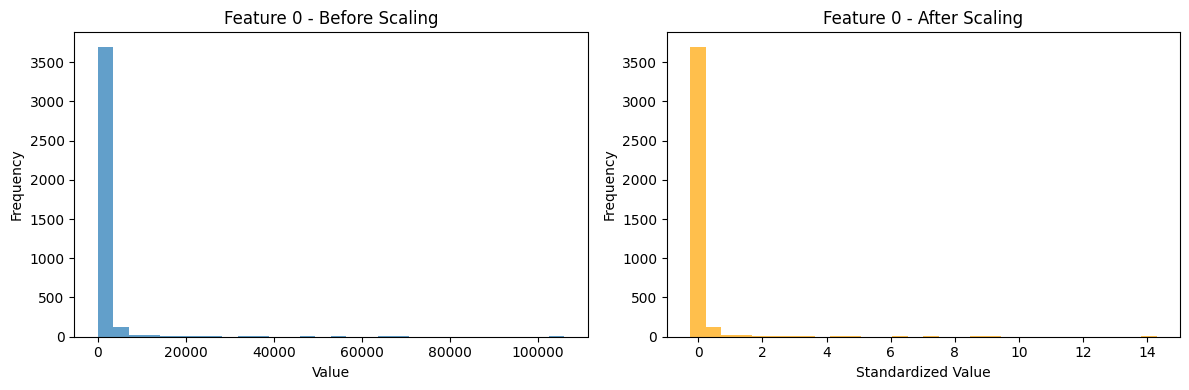

📈 Scaling visualization completed!


In [7]:

# ============================================================================

# STEP 6: SCALE FEATURES
print("\n" + "="*60)
print("STEP 6: SCALING FEATURES")
print("="*60)

# Fit scaler on training data and transform all datasets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled using StandardScaler")
print(f"   Scaler fitted on training data")
print(f"   All datasets transformed consistently")

# Show scaling statistics
print(f"\n📊 SCALING STATISTICS:")
print(f"   Original X_train mean: {X_train.mean():.4f}")
print(f"   Scaled X_train mean: {X_train_scaled.mean():.4f}")
print(f"   Original X_train std: {X_train.std():.4f}")
print(f"   Scaled X_train std: {X_train_scaled.std():.4f}")

# Visualize scaling effect on first few features
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(X_train[:, 0], bins=30, alpha=0.7, label='Original')
plt.title('Feature 0 - Before Scaling')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(X_train_scaled[:, 0], bins=30, alpha=0.7, label='Scaled', color='orange')
plt.title('Feature 0 - After Scaling')
plt.xlabel('Standardized Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("📈 Scaling visualization completed!")


In [8]:

# ============================================================================

# STEP 7: TRAIN SVM WITH HYPERPARAMETER TUNING
print("\n" + "="*60)
print("STEP 7: TRAINING SVM WITH HYPERPARAMETER TUNING")
print("="*60)

# Define range of C values for hyperparameter tuning
epochs = 15
C_values = np.logspace(-3, 2, epochs)

print(f"🔧 HYPERPARAMETER TUNING SETUP:")
print(f"   Number of C values to test: {epochs}")
print(f"   C value range: {C_values.min():.6f} to {C_values.max():.6f}")
print(f"   Using RBF kernel")

# Initialize tracking variables
training_history = {'train_acc': [], 'val_acc': []}
best_val_acc = 0
best_C = None
best_model = None

print(f"\n🚀 TRAINING IN PROGRESS:")
print("Epoch | C Value  | Train Acc | Val Acc | Status")
print("-" * 50)

for i, C in enumerate(C_values):
    # Train SVM with current C value
    model = SVC(C=C, kernel='rbf', random_state=42)
    model.fit(X_train_scaled, y_train)

    # Calculate accuracies
    train_acc = model.score(X_train_scaled, y_train)
    val_acc = model.score(X_val_scaled, y_val)

    # Store training history
    training_history['train_acc'].append(train_acc)
    training_history['val_acc'].append(val_acc)

    # Keep track of best model
    status = ""
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_C = C
        best_model = model
        status = "⭐ BEST"

    print(f"{i+1:5d} | {C:8.6f} | {train_acc:9.4f} | {val_acc:7.4f} | {status}")

print(f"\n🏆 TRAINING COMPLETED!")
print(f"   Best validation accuracy: {best_val_acc:.4f}")
print(f"   Best C parameter: {best_C:.6f}")

# Use the best model
final_model = best_model



STEP 7: TRAINING SVM WITH HYPERPARAMETER TUNING
🔧 HYPERPARAMETER TUNING SETUP:
   Number of C values to test: 15
   C value range: 0.001000 to 100.000000
   Using RBF kernel

🚀 TRAINING IN PROGRESS:
Epoch | C Value  | Train Acc | Val Acc | Status
--------------------------------------------------
    1 | 0.001000 |    0.3397 |  0.3266 | ⭐ BEST
    2 | 0.002276 |    0.3397 |  0.3266 | 
    3 | 0.005179 |    0.3397 |  0.3266 | 
    4 | 0.011788 |    0.3442 |  0.3325 | ⭐ BEST
    5 | 0.026827 |    0.6164 |  0.5586 | ⭐ BEST
    6 | 0.061054 |    0.7024 |  0.6509 | ⭐ BEST
    7 | 0.138950 |    0.7146 |  0.6675 | ⭐ BEST
    8 | 0.316228 |    0.7933 |  0.7314 | ⭐ BEST
    9 | 0.719686 |    0.8851 |  0.8320 | ⭐ BEST
   10 | 1.637894 |    0.9122 |  0.8580 | ⭐ BEST
   11 | 3.727594 |    0.9282 |  0.8734 | ⭐ BEST
   12 | 8.483429 |    0.9500 |  0.8947 | ⭐ BEST
   13 | 19.306977 |    0.9718 |  0.8994 | ⭐ BEST
   14 | 43.939706 |    0.9853 |  0.9077 | ⭐ BEST
   15 | 100.000000 |    0.9942 |  0.905


STEP 8: TRAINING HISTORY VISUALIZATION


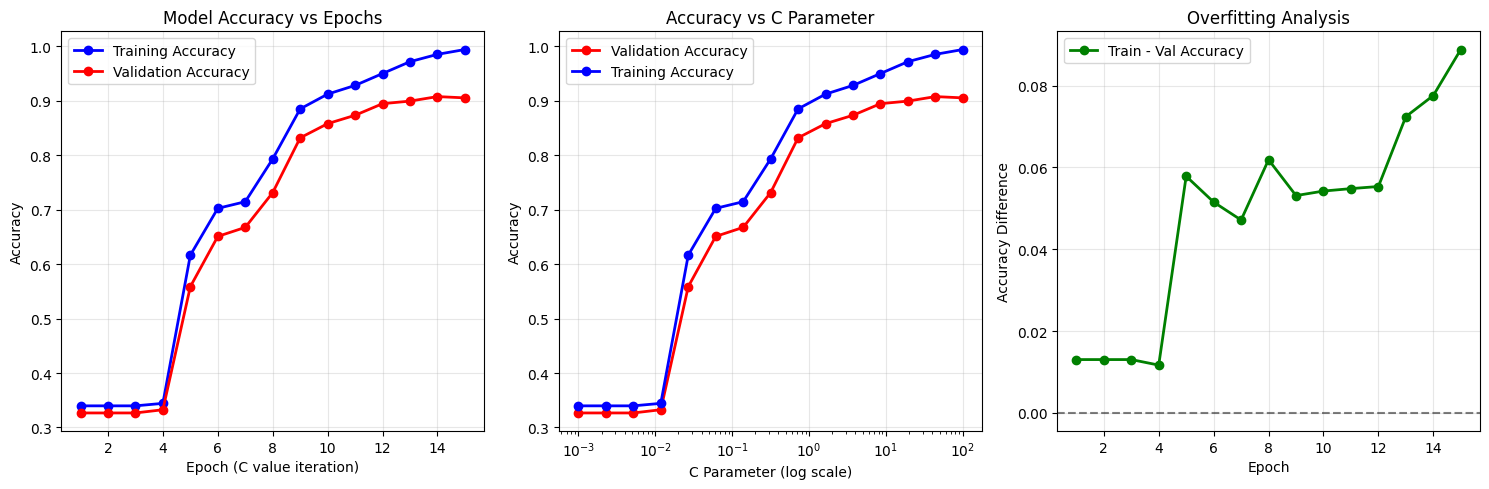

📈 Training history visualization completed!


In [9]:

# ============================================================================

# STEP 8: PLOT TRAINING HISTORY
print("\n" + "="*60)
print("STEP 8: TRAINING HISTORY VISUALIZATION")
print("="*60)

plt.figure(figsize=(15, 5))

# Plot 1: Accuracy vs Epochs
plt.subplot(1, 3, 1)
epochs_range = range(1, len(training_history['train_acc']) + 1)
plt.plot(epochs_range, training_history['train_acc'], 'b-o', label='Training Accuracy', linewidth=2)
plt.plot(epochs_range, training_history['val_acc'], 'r-o', label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy vs Epochs')
plt.xlabel('Epoch (C value iteration)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Accuracy vs C Parameter
plt.subplot(1, 3, 2)
plt.semilogx(C_values, training_history['val_acc'], 'ro-', label='Validation Accuracy', linewidth=2)
plt.semilogx(C_values, training_history['train_acc'], 'bo-', label='Training Accuracy', linewidth=2)
plt.title('Accuracy vs C Parameter')
plt.xlabel('C Parameter (log scale)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Overfitting Analysis
plt.subplot(1, 3, 3)
overfitting = np.array(training_history['train_acc']) - np.array(training_history['val_acc'])
plt.plot(epochs_range, overfitting, 'g-o', label='Train - Val Accuracy', linewidth=2)
plt.title('Overfitting Analysis')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Difference')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("📈 Training history visualization completed!")


In [10]:
# ============================================================================

# STEP 9: MODEL EVALUATION FUNCTION
def evaluate_model(model, X, y, dataset_name):
    """Evaluate model and return metrics with detailed output"""
    print(f"\n🔍 EVALUATING {dataset_name.upper()} DATASET")
    print("-" * 40)

    # Make predictions
    y_pred = model.predict(X)

    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1_weighted = f1_score(y, y_pred, average='weighted')
    f1_macro = f1_score(y, y_pred, average='macro')

    # Display metrics
    print(f"📊 PERFORMANCE METRICS:")
    print(f"   Accuracy:           {accuracy:.4f}")
    print(f"   Precision (Weighted): {precision:.4f}")
    print(f"   Recall (Weighted):    {recall:.4f}")
    print(f"   F1 Score (Weighted):  {f1_weighted:.4f}")
    print(f"   F1 Score (Macro):     {f1_macro:.4f}")

    # Detailed classification report
    print(f"\n📋 DETAILED CLASSIFICATION REPORT:")
    target_names = ['Low', 'Medium', 'High']
    print(classification_report(y, y_pred, target_names=target_names))

    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_weighted': f1_weighted,
        'f1_macro': f1_macro
    }

    return metrics, y_pred


In [11]:

# ============================================================================

# STEP 10: EVALUATE ON VALIDATION SET
print("\n" + "="*60)
print("STEP 10: VALIDATION SET EVALUATION")
print("="*60)

val_metrics, val_pred = evaluate_model(final_model, X_val_scaled, y_val, "Validation")



STEP 10: VALIDATION SET EVALUATION

🔍 EVALUATING VALIDATION DATASET
----------------------------------------
📊 PERFORMANCE METRICS:
   Accuracy:           0.9077
   Precision (Weighted): 0.9078
   Recall (Weighted):    0.9077
   F1 Score (Weighted):  0.9077
   F1 Score (Macro):     0.9082

📋 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         Low       0.94      0.95      0.95       279
      Medium       0.87      0.88      0.87       290
        High       0.92      0.90      0.91       276

    accuracy                           0.91       845
   macro avg       0.91      0.91      0.91       845
weighted avg       0.91      0.91      0.91       845



In [12]:

# ============================================================================

# STEP 11: EVALUATE ON TEST SET
print("\n" + "="*60)
print("STEP 11: TEST SET EVALUATION")
print("="*60)

test_metrics, test_pred = evaluate_model(final_model, X_test_scaled, y_test, "Test")



STEP 11: TEST SET EVALUATION

🔍 EVALUATING TEST DATASET
----------------------------------------
📊 PERFORMANCE METRICS:
   Accuracy:           0.9207
   Precision (Weighted): 0.9206
   Recall (Weighted):    0.9207
   F1 Score (Weighted):  0.9206
   F1 Score (Macro):     0.9199

📋 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

         Low       0.93      0.94      0.94       275
      Medium       0.89      0.88      0.88       270
        High       0.94      0.94      0.94       300

    accuracy                           0.92       845
   macro avg       0.92      0.92      0.92       845
weighted avg       0.92      0.92      0.92       845




STEP 12: CONFUSION MATRIX VISUALIZATION


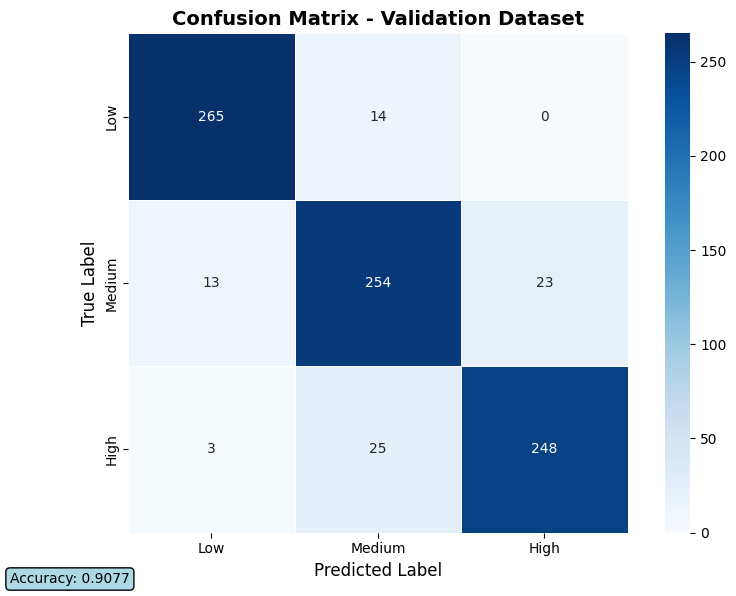


📊 CONFUSION MATRIX ANALYSIS for Validation:
Matrix values (True labels as rows, Predicted as columns):
        Low  Medium  High
Low     265      14     0
Medium   13     254    23
High      3      25   248

📈 PER-CLASS ANALYSIS:
   Low Class:
      Precision: 0.9431
      Recall:    0.9498
      F1-Score:  0.9464
   Medium Class:
      Precision: 0.8669
      Recall:    0.8759
      F1-Score:  0.8714
   High Class:
      Precision: 0.9151
      Recall:    0.8986
      F1-Score:  0.9068


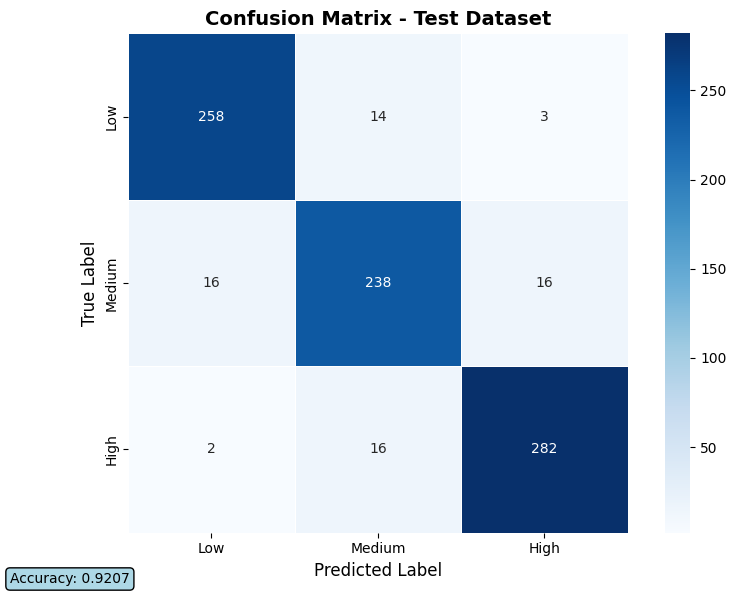


📊 CONFUSION MATRIX ANALYSIS for Test:
Matrix values (True labels as rows, Predicted as columns):
        Low  Medium  High
Low     258      14     3
Medium   16     238    16
High      2      16   282

📈 PER-CLASS ANALYSIS:
   Low Class:
      Precision: 0.9348
      Recall:    0.9382
      F1-Score:  0.9365
   Medium Class:
      Precision: 0.8881
      Recall:    0.8815
      F1-Score:  0.8848
   High Class:
      Precision: 0.9369
      Recall:    0.9400
      F1-Score:  0.9384


In [13]:

# ============================================================================

# STEP 12: CONFUSION MATRIX VISUALIZATION
def plot_confusion_matrix(y_true, y_pred, dataset_name):
    """Plot confusion matrix with detailed analysis"""
    plt.figure(figsize=(8, 6))

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    labels = ['Low', 'Medium', 'High']

    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=labels, yticklabels=labels,
               square=True, linewidths=0.5)

    plt.title(f'Confusion Matrix - {dataset_name} Dataset', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)

    # Add accuracy information
    accuracy = accuracy_score(y_true, y_pred)
    plt.figtext(0.02, 0.02, f'Accuracy: {accuracy:.4f}', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))

    plt.tight_layout()
    plt.show()

    # Print confusion matrix analysis
    print(f"\n📊 CONFUSION MATRIX ANALYSIS for {dataset_name}:")
    print("Matrix values (True labels as rows, Predicted as columns):")
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    print(cm_df)

    # Calculate per-class metrics
    print(f"\n📈 PER-CLASS ANALYSIS:")
    for i, label in enumerate(labels):
        tp = cm[i, i]  # True positives
        fp = sum(cm[:, i]) - tp  # False positives
        fn = sum(cm[i, :]) - tp  # False negatives
        tn = sum(sum(cm)) - tp - fp - fn  # True negatives

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        print(f"   {label} Class:")
        print(f"      Precision: {precision:.4f}")
        print(f"      Recall:    {recall:.4f}")
        print(f"      F1-Score:  {f1:.4f}")

print("\n" + "="*60)
print("STEP 12: CONFUSION MATRIX VISUALIZATION")
print("="*60)

# Plot confusion matrices for both validation and test sets
plot_confusion_matrix(y_val, val_pred, "Validation")
plot_confusion_matrix(y_test, test_pred, "Test")


In [14]:

# ============================================================================

# STEP 13: MODEL ANALYSIS AND INSIGHTS
print("\n" + "="*60)
print("STEP 13: MODEL ANALYSIS AND INSIGHTS")
print("="*60)

print("🔍 SVM MODEL ANALYSIS:")
print(f"   Kernel: {final_model.kernel}")
print(f"   C Parameter: {final_model.C:.6f}")
print(f"   Number of support vectors: {final_model.n_support_}")
print(f"   Total support vectors: {len(final_model.support_)}")
print(f"   Support vector ratio: {len(final_model.support_) / len(X_train_scaled):.4f}")

# Class distribution in support vectors
print(f"\n📊 SUPPORT VECTORS BY CLASS:")
for i, class_name in enumerate(['Low', 'Medium', 'High']):
    print(f"   {class_name}: {final_model.n_support_[i]} support vectors")



STEP 13: MODEL ANALYSIS AND INSIGHTS
🔍 SVM MODEL ANALYSIS:
   Kernel: rbf
   C Parameter: 43.939706
   Number of support vectors: [456 681 515]
   Total support vectors: 1652
   Support vector ratio: 0.4191

📊 SUPPORT VECTORS BY CLASS:
   Low: 456 support vectors
   Medium: 681 support vectors
   High: 515 support vectors


In [15]:

# ============================================================================

# STEP 14: CROSS-VALIDATION ANALYSIS
print("\n" + "="*60)
print("STEP 14: CROSS-VALIDATION ANALYSIS")
print("="*60)

# Combine train and validation data for cross-validation
X_combined = np.vstack([X_train_scaled, X_val_scaled])
y_combined = np.hstack([y_train, y_val])

print("🔄 PERFORMING 5-FOLD CROSS-VALIDATION:")
print(f"   Combined dataset size: {len(X_combined)} samples")
print(f"   Using best C parameter: {best_C:.6f}")

# Perform cross-validation
cv_model = SVC(C=best_C, kernel='rbf', random_state=42)
cv_scores = cross_val_score(cv_model, X_combined, y_combined, cv=5, scoring='f1_macro')

print(f"\n📊 CROSS-VALIDATION RESULTS:")
print(f"   Individual fold scores: {[f'{score:.4f}' for score in cv_scores]}")
print(f"   Mean CV F1 Score: {cv_scores.mean():.4f}")
print(f"   Standard deviation: {cv_scores.std():.4f}")
print(f"   95% Confidence interval: {cv_scores.mean():.4f} ± {cv_scores.std() * 2:.4f}")

# ============================================================================



STEP 14: CROSS-VALIDATION ANALYSIS
🔄 PERFORMING 5-FOLD CROSS-VALIDATION:
   Combined dataset size: 4787 samples
   Using best C parameter: 43.939706

📊 CROSS-VALIDATION RESULTS:
   Individual fold scores: ['0.9052', '0.9026', '0.8939', '0.9088', '0.9102']
   Mean CV F1 Score: 0.9042
   Standard deviation: 0.0058
   95% Confidence interval: 0.9042 ± 0.0116


In [16]:

# STEP 15: FINAL SUMMARY AND COMPARISON
print("\n" + "="*60)
print("STEP 15: FINAL SUMMARY")
print("="*60)

print("🏆 FINAL PERFORMANCE SUMMARY:")
print(f"{'Metric':<20} {'Validation':<12} {'Test':<12} {'Cross-Val':<12}")
print("-" * 56)
print(f"{'Accuracy':<20} {val_metrics['accuracy']:<12.4f} {test_metrics['accuracy']:<12.4f} {'N/A':<12}")
print(f"{'F1 (Macro)':<20} {val_metrics['f1_macro']:<12.4f} {test_metrics['f1_macro']:<12.4f} {cv_scores.mean():<12.4f}")
print(f"{'F1 (Weighted)':<20} {val_metrics['f1_weighted']:<12.4f} {test_metrics['f1_weighted']:<12.4f} {'N/A':<12}")
print(f"{'Precision':<20} {val_metrics['precision']:<12.4f} {test_metrics['precision']:<12.4f} {'N/A':<12}")
print(f"{'Recall':<20} {val_metrics['recall']:<12.4f} {test_metrics['recall']:<12.4f} {'N/A':<12}")

print(f"\n🎯 KEY INSIGHTS:")
if test_metrics['accuracy'] > 0.8:
    print("   ✅ Excellent model performance (>80% accuracy)")
elif test_metrics['accuracy'] > 0.7:
    print("   ✅ Good model performance (70-80% accuracy)")
else:
    print("   ⚠️  Model performance could be improved (<70% accuracy)")

if abs(val_metrics['accuracy'] - test_metrics['accuracy']) < 0.05:
    print("   ✅ Good generalization (validation and test scores are similar)")
else:
    print("   ⚠️  Possible overfitting (significant difference between validation and test)")

print(f"\n🔧 HYPERPARAMETER OPTIMIZATION:")
print(f"   Best C parameter: {best_C:.6f}")
print(f"   This C value provides the best balance between bias and variance")

print(f"\n📈 MODEL CHARACTERISTICS:")
print(f"   Support vector ratio: {len(final_model.support_) / len(X_train_scaled):.2%}")
if len(final_model.support_) / len(X_train_scaled) < 0.5:
    print("   ✅ Efficient model (uses fewer than 50% of training samples as support vectors)")
else:
    print("   ⚠️  Complex decision boundary (uses many support vectors)")

print(f"\n🎉 PIPELINE EXECUTION COMPLETED SUCCESSFULLY!")
print("="*60)


STEP 15: FINAL SUMMARY
🏆 FINAL PERFORMANCE SUMMARY:
Metric               Validation   Test         Cross-Val   
--------------------------------------------------------
Accuracy             0.9077       0.9207       N/A         
F1 (Macro)           0.9082       0.9199       0.9042      
F1 (Weighted)        0.9077       0.9206       N/A         
Precision            0.9078       0.9206       N/A         
Recall               0.9077       0.9207       N/A         

🎯 KEY INSIGHTS:
   ✅ Excellent model performance (>80% accuracy)
   ✅ Good generalization (validation and test scores are similar)

🔧 HYPERPARAMETER OPTIMIZATION:
   Best C parameter: 43.939706
   This C value provides the best balance between bias and variance

📈 MODEL CHARACTERISTICS:
   Support vector ratio: 41.91%
   ✅ Efficient model (uses fewer than 50% of training samples as support vectors)

🎉 PIPELINE EXECUTION COMPLETED SUCCESSFULLY!
